In [2]:
#Step 1: Import necessary libraries
#Step 2:Load the data
#Step 3:Explore the data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='oucXfvh0naTfSn8Bbhhhzduh56BUhWaAHz7E80Fs4B8Q',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu-de.cloud-object-storage.appdomain.cloud')

bucket = 'netflixdataanalysisusingpython-donotdelete-pr-uxq3h2czbd2rls'
object_key = 'netflix_titles.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head(10)



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
#Set styles for plots
sns.set(style="darkgrid")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


In [6]:
print('\n Missing values in the dataset:')
print(df.isnull().sum())


 Missing values in the dataset:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [7]:
#Step 4: Clean the data
#For simplicity, we will delete/drop rows with missing values
df=df.dropna()

In [8]:
print(df)

     show_id     type                          title             director  \
7         s8    Movie                        Sankofa         Haile Gerima   
8         s9  TV Show  The Great British Baking Show      Andy Devonshire   
9        s10    Movie                   The Starling       Theodore Melfi   
12       s13    Movie                   Je Suis Karl  Christian Schwochow   
24       s25    Movie                          Jeans           S. Shankar   
...      ...      ...                            ...                  ...   
8801   s8802    Movie                        Zinzana      Majid Al Ansari   
8802   s8803    Movie                         Zodiac        David Fincher   
8804   s8805    Movie                     Zombieland      Ruben Fleischer   
8805   s8806    Movie                           Zoom         Peter Hewitt   
8806   s8807    Movie                         Zubaan          Mozez Singh   

                                                   cast  \
7     Kofi Ghana

In [10]:
df.shape

(5332, 12)

In [11]:
print('\nDataset information after cleaning:')
print(df.isnull().sum())


Dataset information after cleaning:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [12]:
# Step 5: Non-Graphical Analysis
print("\nValue counts for 'type':")
df['type'].value_counts()  # Value counts for 'type'


Value counts for 'type':


Movie      5185
TV Show     147
Name: type, dtype: int64

In [13]:
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}:{df[column].nunique()}unique values")


Unique values in each column:
show_id:5332unique values
type:2unique values
title:5332unique values
director:3945unique values
cast:5200unique values
country:604unique values
date_added:1453unique values
release_year:72unique values
rating:14unique values
duration:198unique values
listed_in:335unique values
description:5321unique values



Distribution of Titles by Type:


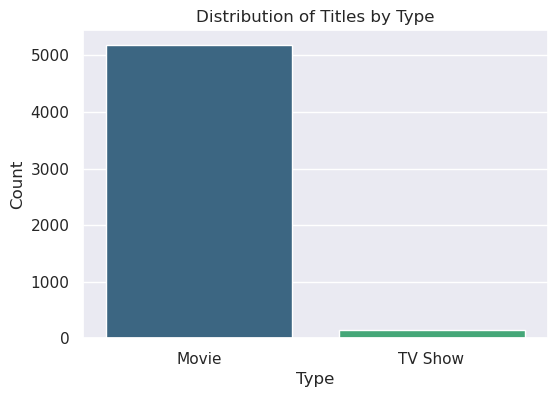

In [14]:
# Step 6: Visual Analysis
# Univariate Analysis
print("\nDistribution of Titles by Type:")
plt.figure(figsize=(6, 4))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Titles by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

Insight: Movies are more prevalent than TV shows on Netflix. This indicates that Netflix has historically focused more on acquiring or producing movies compared to TV shows.



Number of titles released each year:


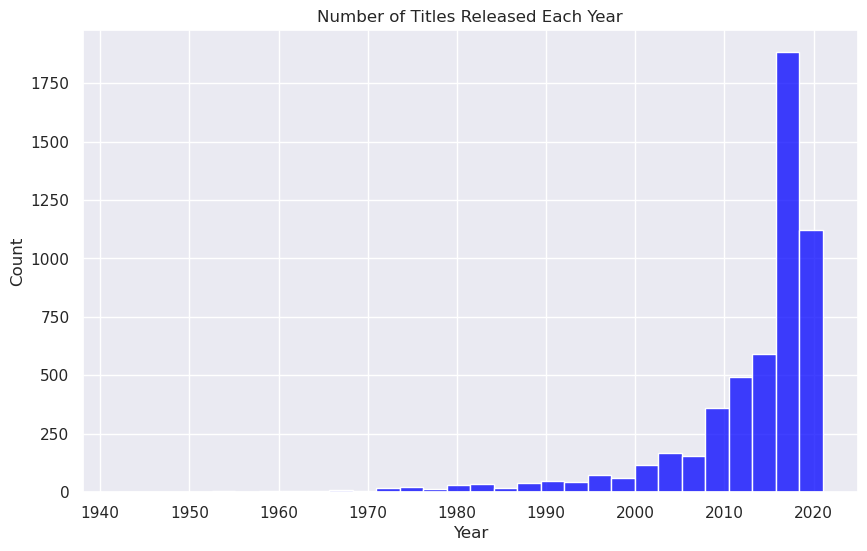

In [15]:
print("\nNumber of titles released each year:")
plt.figure(figsize=(10, 6))
sns.histplot(df['release_year'], kde=False, bins=30, color='blue')
plt.title('Number of Titles Released Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Insight: The number of movies released per year has seen a significant increase, especially in the last decade, indicating a growing trend in movie production and acquisition by Netflix.




Number of titles released each year by type:


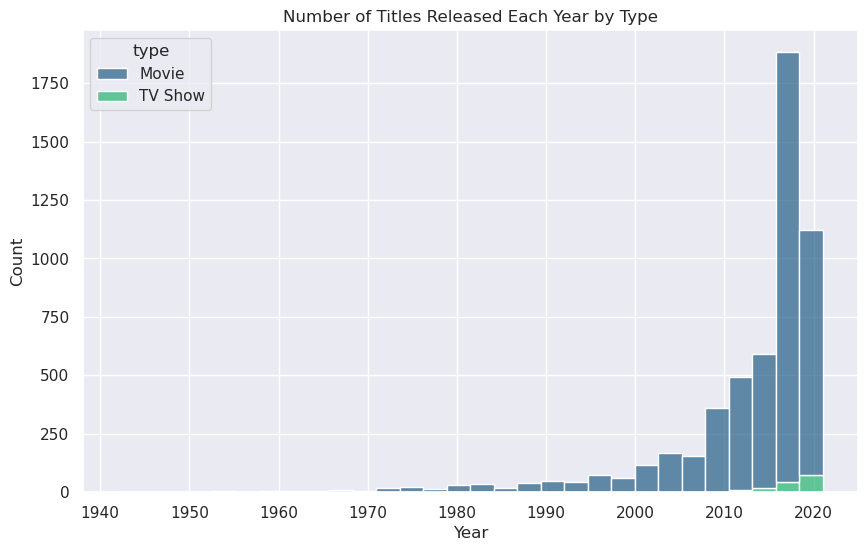

In [16]:
# Bivariate Analysis
print("\nNumber of titles released each year by type:")
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', hue='type', multiple='stack', bins=30, palette='viridis')
plt.title('Number of Titles Released Each Year by Type')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [17]:
#Analysis of Actors/Directors
# Let's focus on the top 10 actors and directors

from collections import Counter

# Function to get the top N elements from a column with list-like strings
def get_top_elements(column, n=10):
    all_elements = []
    df[column].dropna().apply(lambda x: all_elements.extend(x.split(', ')))
    return Counter(all_elements).most_common(n)

top_actors = get_top_elements('cast', 10)
top_directors = get_top_elements('director', 10)

In [18]:
print('\nTop 10 actors:')
print(top_actors)


Top 10 actors:
[('Anupam Kher', 42), ('Shah Rukh Khan', 34), ('Naseeruddin Shah', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Amitabh Bachchan', 28), ('Paresh Rawal', 28), ('Boman Irani', 27), ('Kareena Kapoor', 25), ('Samuel L. Jackson', 21)]


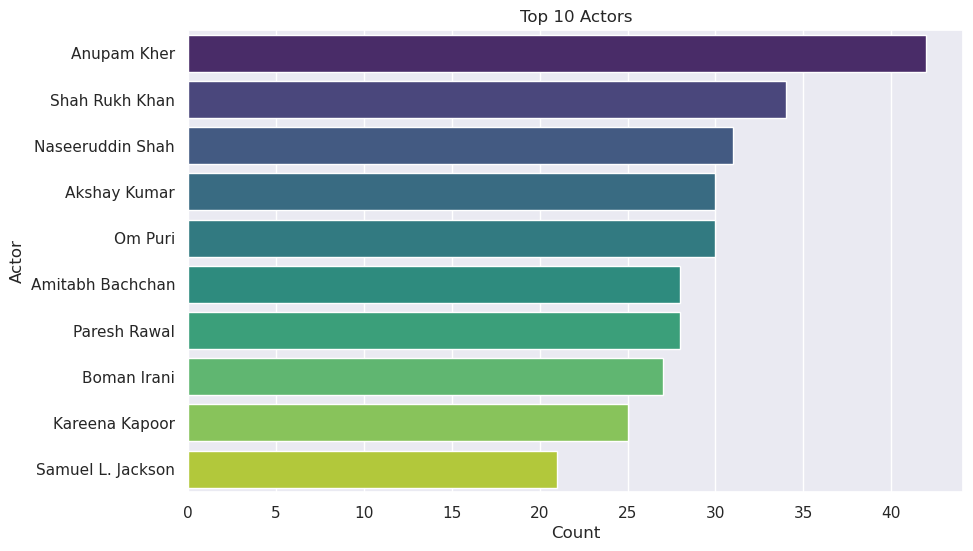

In [19]:
 #Plot top actors
actors, counts = zip(*top_actors)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(actors), palette='viridis')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('Actor')
plt.show()

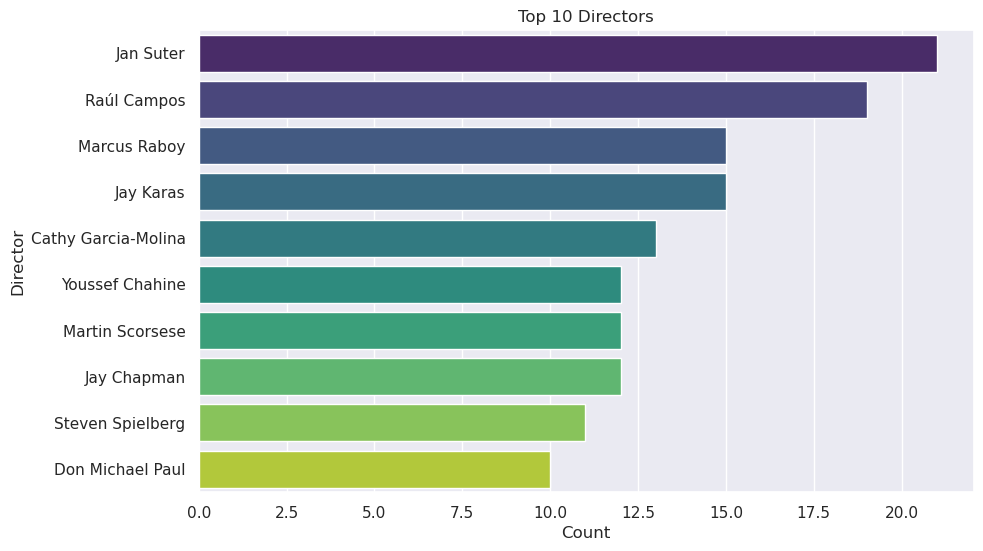

In [20]:
# Plot top directors
directors, counts = zip(*top_directors)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(counts), y=list(directors), palette='viridis')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('Director')
plt.show()

In [21]:
# Genre Analysis
print("\nTop 10 genres:")
top_genres = df['listed_in'].value_counts().head(10)
print(top_genres)


Top 10 genres:
Dramas, International Movies                        336
Stand-Up Comedy                                     286
Comedies, Dramas, International Movies              257
Dramas, Independent Movies, International Movies    243
Children & Family Movies, Comedies                  179
Dramas, International Movies, Romantic Movies       160
Documentaries                                       156
Comedies, International Movies                      152
Comedies, International Movies, Romantic Movies     143
Dramas                                              133
Name: listed_in, dtype: int64


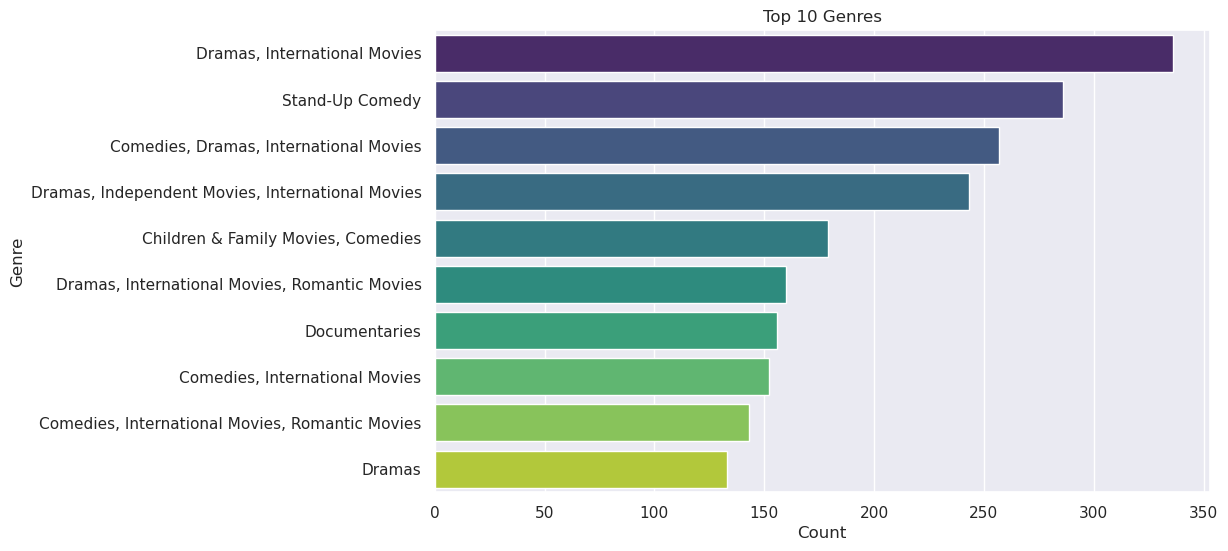

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

/tmp/wsuser/ipykernel_163/4209421221.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)



Distribution of movie durations:


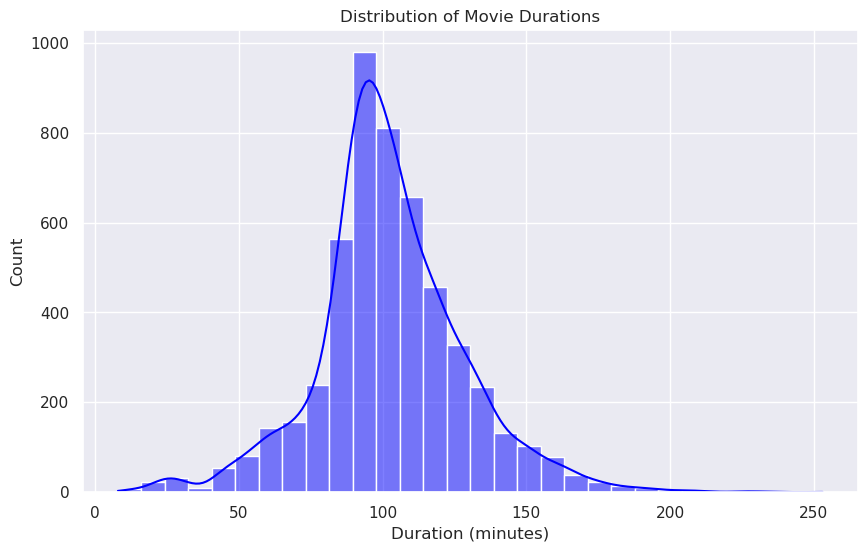

In [24]:
# Analysis 5: Duration Analysis (for Movies)
# Convert duration to numeric values for movies
netflix_movies=df[df['type'] == 'Movie']
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '').astype(int)

print("\nDistribution of movie durations:")
plt.figure(figsize=(10, 6))
sns.histplot(netflix_movies['duration'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()

In [25]:
insights = {
    "Most titles on Netflix are movies.": "Netflix could explore increasing their series content to balance the distribution.",
    "The number of titles released each year has been increasing.": "Netflix should continue to invest in new content to maintain and grow its subscriber base.",
    "The USA is the leading country in terms of the number of titles.": "Netflix could focus on acquiring and producing more content from other countries to diversify its library.",
    "Drama, Comedy, and Documentaries are the most popular genres.": "Netflix should invest more in these genres, as they are highly popular among viewers.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time.",
    "Certain actors and directors are frequently featured.": "Netflix should continue to collaborate with popular actors and directors to attract their fanbase.",
    "Most movies have a duration between 80 and 120 minutes.": "Netflix could consider producing more short films and mini-series to cater to viewers with less time."
}

print("\nInsights and Recommendations:")
for insight, recommendation in insights.items():
    print(f"- Insight: {insight}\n  Recommendation: {recommendation}\n")



Insights and Recommendations:
- Insight: Most titles on Netflix are movies.
  Recommendation: Netflix could explore increasing their series content to balance the distribution.

- Insight: The number of titles released each year has been increasing.
  Recommendation: Netflix should continue to invest in new content to maintain and grow its subscriber base.

- Insight: The USA is the leading country in terms of the number of titles.
  Recommendation: Netflix could focus on acquiring and producing more content from other countries to diversify its library.

- Insight: Drama, Comedy, and Documentaries are the most popular genres.
  Recommendation: Netflix should invest more in these genres, as they are highly popular among viewers.

- Insight: Most movies have a duration between 80 and 120 minutes.
  Recommendation: Netflix could consider producing more short films and mini-series to cater to viewers with less time.

- Insight: Certain actors and directors are frequently featured.
  Reco

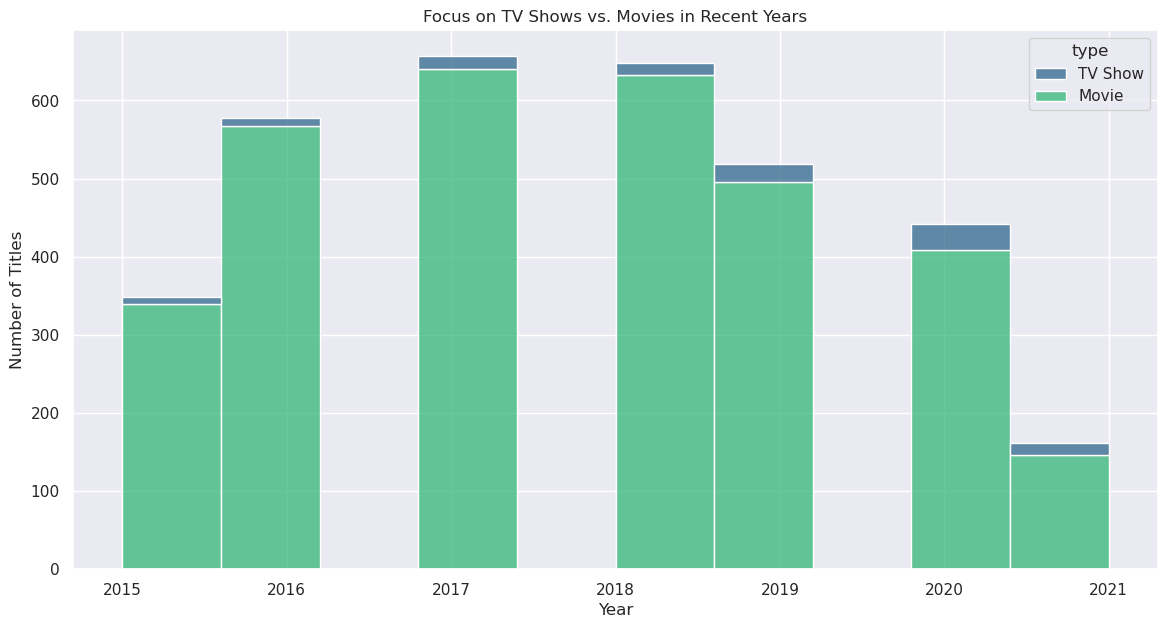

In [26]:
#Focus on TV Shows vs. Movies in recent years
recent_years_data = df[df['release_year'] >= 2015]

plt.figure(figsize=(14, 7))
sns.histplot(data=recent_years_data, x='release_year', hue='type', multiple='stack', bins=10, palette='viridis')
plt.title('Focus on TV Shows vs. Movies in Recent Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
 #Content available in different countries
top_countries_content = netflix_data_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(14, 7))
sns.barplot(y=top_countries_content.index, x=top_countries_content.values, palette='viridis')
plt.title('Top 10 Countries with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()